In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph ## KNN的K近邻计算

import sklearn.datasets as ds

In [11]:
## 设置属性防止中文乱码及拦截异常信息
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore', category=UserWarning)

##### 1.1、产生模拟数据

In [12]:
np.random.seed(0)   # 设定种子
N = 1000
center = ((-1, 1), (1, 1), (1, -1), (-1, -1))   # 4个中心点
data1, y1 = ds.make_blobs(n_samples=N, n_features=2, centers=center, random_state=0)

# 产生噪音点
n_noise = int(0.1*N)
noise = np.random.rand(n_noise, 2)   # 设置二维噪音点数组（n_noise, 2）

data1[0:5]

array([[-2.04855297, -0.42001794],
       [ 0.76405235,  1.40015721],
       [-1.49579549,  0.21657771],
       [ 3.11679102, -0.6108784 ],
       [-1.73087359, -2.64170323]])

##### 1.2、用1.1数据生成新数据
—— concatenate()：数组拼接,axis=0，往下拼接

In [15]:
# list在使用np.min(*)和*.min()时的差异
data00 = np.array([[1,2],[3,0],[1,1]])
# Z,C = data00.min()   # 'numpy.int32' object is not iterable 不可以这么使用*.min()
Z = np.min(data00, axis=0)   # 返回[1, 0]

In [14]:
min1, min2 = np.min(data1, axis=0)   # 数组的处理方法，和DataFrame略有差别
max1, max2 = np.max(data1, axis=0)
noise[:, 0] = noise[:, 0] * (max1-min1) + min1   # 随机产生一些数据
noise[:, 1] = noise[:, 1] * (max2-min2) + min2

# 上下叠加正常数据和噪音数据
data1_noise = np.concatenate((data1, noise), axis=0)
y1_noise = np.concatenate((y1, [4]*n_noise))

##### 2、生成月牙形（两个月牙）模拟数据
—— make_moons()：生成两个月牙形的数据

    -》noise：噪音比例

In [5]:
data2, y2 = ds.make_moons(n_samples=N, noise=.05)
data2 = np.array(data2)

n_noise = int(0.1 * N)
noise = np.random.rand(n_noise, 2)

min1, min2 = np.min(data2, axis=0)
max1, max2 = np.max(data2, axis=0)
noise[:, 0] = noise[:, 0] * (max1 - min1) + min1
noise[:, 1] = noise[:, 1] * (max2 - min2) + min2

data2_noise = np.concatenate((data2, noise), axis=0)
y2_noise = np.concatenate((y2, [3] * n_noise))

##### 2、画图

In [6]:
def expandBorder(a, b):   # 控制坐标界限
    d = (b - a) * 0.1
    return a-d, b+d

—— kneighbors_graph([X,n_neighbors,mode,metric,p]) 计算X中k个临近点对应的权重。每个点都会作为中心点计算一次，返回临近的7个点和其距离。

    -》n_neighbors：纳入计算的样本数量，可选（默认值为5）,用kneighbors_graph查找的近邻数
    -》metric：用于计算每个样本点的k邻域的距离度量。默认距离是‘euclidean’(‘Minkowski’时p值等于2)
    -》p：整数，可选（默认值为2）。是sklearn.metrics.pairwise.pairwise_distance
里的闵可夫斯基度量参数，当 p=1时，使用曼哈顿距离。当p=2时，使用欧氏距离。对于任意的p，使用闵可夫斯基距离

—— Agglomerative Clutsering 自底而上的层次聚类方法，能够根据指定的相似度或距离定义计算出类之间的距离

    -》affinity：用于计算距离。ward只支持euclidean方法
    -》connectivity：用于指定连接矩阵

类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1] ；聚类簇数目: 2
类别: [0 1] ；聚类簇数目: 2
类别: [0 1] ；聚类簇数目: 2
类别: [0 1] ；聚类簇数目: 2
类别: [0 1] ；聚类簇数目: 2
类别: [0 1] ；聚类簇数目: 2


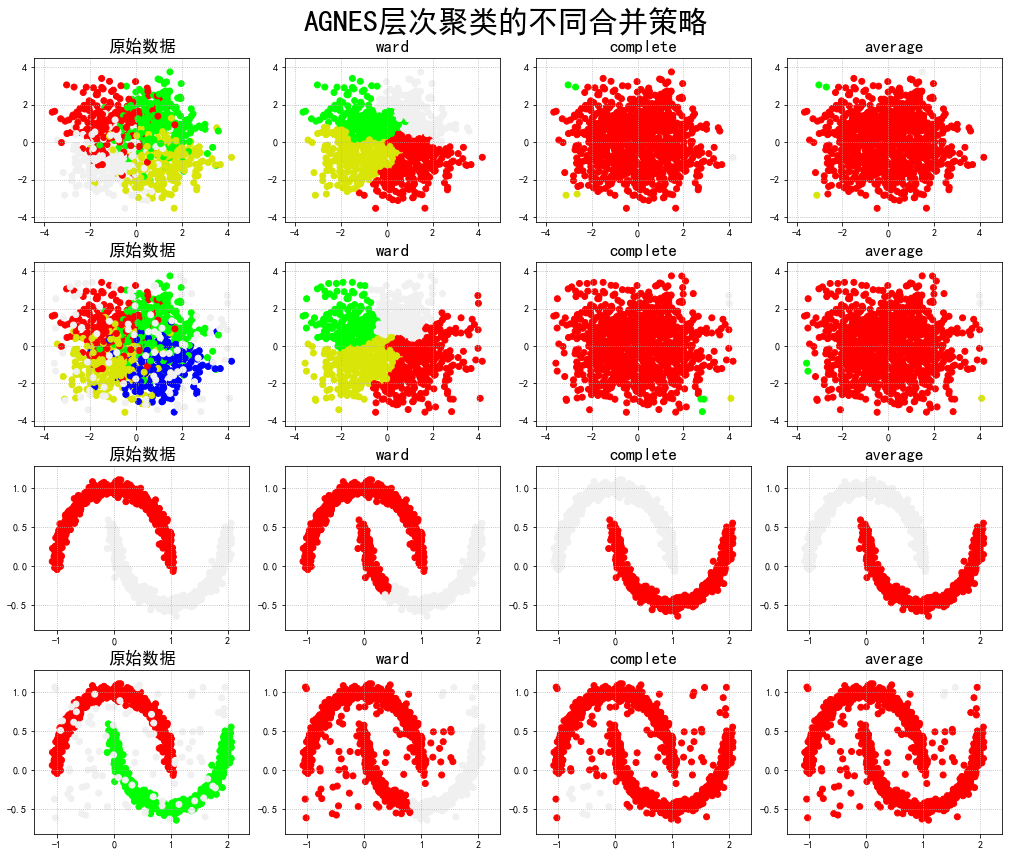

In [13]:
cm = mpl.colors.ListedColormap(['#FF0000', '#00FF00',  '#0000FF', '#d8e507', '#F0F0F0'])
plt.figure(figsize=(14, 12), facecolor='w')

linkages = ("ward", "complete", "average")   # 距离方法：最小距离、最大距离、平均距离

for i, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),(2, data2, y2), (2, data2_noise, y2_noise))):
# 4和2是用来控制模型中心点数量的
# enumerate只能返回两个参数（第一个为索引号），故将返回值转化为元组类型，此时enumerate后的数据也为对应的元组

    plt.subplot(4, 4, 4*i+1)   # 4行4列，循环建立子图(index为0，1，2，3)
    plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)   # 原始点
    plt.title('原始数据', fontsize=17)
    plt.grid(b=True, ls=':')
    
    min1, min2 = np.min(data, axis=0)
    max1, max2 = np.max(data, axis=0)
    plt.xlim(expandBorder(min1, max1))
    plt.ylim(expandBorder(min2, max2))

    # 计算类别与类别的距离(只计算最接近的七个样本的距离) -- 保证在agens算法，可以不重复的计算点与点之间的距离
    connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
    connectivity = 0.5*(connectivity + connectivity.T)   # 填充空白最小距离。如当A-B为对A的最小距离时，不是对B的最小距离。
                                                         # 作为预计算，可减少最小距离计算时间
                                                         # 距离减半方便空白最小距离点能够融合为一个类别
    for j, linkage in enumerate(linkages):
        ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',connectivity=connectivity, linkage=linkage)
        ac.fit(data)
        y = ac.labels_   # 获取样本的分类类型，可以理解成ac.predict(data)
#         y = ac.fit_predict(data)   # 层次分类法没有predict方法，所以不能直接使用

        unique_y_hat = np.unique(y)   # 唯一化标签，以获得标签类型数目
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
    
        plt.subplot(4, 4, i+2+4*j)   # i用来控制图像位置
        plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
        plt.title(linkage, fontsize=17)
        plt.grid(b=True, ls=':')
        plt.xlim(expandBorder(min1, max1))
        plt.ylim(expandBorder(min2, max2))

plt.suptitle('AGNES层次聚类的不同合并策略', fontsize=30)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
plt.show()

In [8]:
connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
# connectivity = (connectivity + connectivity.T)
print(connectivity)
# help(kneighbors_graph)

  (0, 0)	0.0
  (0, 969)	0.0105198919917967
  (0, 388)	0.018654390854834352
  (0, 705)	0.02480416794961916
  (0, 582)	0.02818567060821379
  (0, 69)	0.029035703024661623
  (0, 346)	0.03247535947526933
  (1, 1)	0.0
  (1, 236)	0.025610311394162893
  (1, 643)	0.03632222737878341
  (1, 1095)	0.03707224956829312
  (1, 344)	0.043577014421715396
  (1, 953)	0.05541570302433216
  (1, 302)	0.057047996123425426
  (2, 2)	0.0
  (2, 121)	0.014901187288402278
  (2, 733)	0.025910821450243975
  (2, 175)	0.026442536326802945
  (2, 374)	0.027218747253880782
  (2, 971)	0.029319927933036956
  (2, 794)	0.03163776143895546
  (3, 3)	0.0
  (3, 557)	0.03177103491943353
  (3, 876)	0.03570041603593361
  (3, 310)	0.03673278955582488
  :	:
  (1096, 451)	0.029998195825164872
  (1096, 805)	0.043341812897027154
  (1096, 574)	0.04403698237647182
  (1096, 677)	0.05046778827894412
  (1097, 1097)	0.0
  (1097, 18)	0.024363240798781986
  (1097, 247)	0.025290726120850968
  (1097, 829)	0.04417018051883951
  (1097, 600)	0.046378

In [9]:
for data, y in zip((data1, y1),(data1_noise, y1_noise)):
# 4和2是用来控制模型中心点数量的

#     print(index)
#     print(n_clusters)
#     print(data)
    print(y)

[[-2.04855297 -0.42001794]
 [ 0.76405235  1.40015721]
 [-1.49579549  0.21657771]
 ...
 [ 2.13161921  0.03940179]
 [-1.87848227 -1.68428542]
 [-3.20479538 -0.36973943]]
[0 0 3 ... 4 4 4]


In [10]:
# print(data1)
for index, (data, y) in enumerate(((data1, y1),(data1_noise, y1_noise))):
# 4和2是用来控制模型中心点数量的

#     print(index)
#     print(n_clusters)
    print(data)
#     print(y)
    

[[-2.04855297 -0.42001794]
 [ 0.76405235  1.40015721]
 [-1.49579549  0.21657771]
 ...
 [ 1.60711167 -2.04817041]
 [ 2.63159743 -0.62224083]
 [ 0.02759711  0.34622107]]
[[-2.04855297 -0.42001794]
 [ 0.76405235  1.40015721]
 [-1.49579549  0.21657771]
 ...
 [ 2.13161921  0.03940179]
 [-1.87848227 -1.68428542]
 [-3.20479538 -0.36973943]]


In [81]:
# print(data1)
for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),(2, data2, y2), (2, data2_noise, y2_noise))):
# 4和2是用来控制模型中心点数量的

#     print(index)
#     print(n_clusters)
#     print(data)
    print()
    print(y)
    


[0 0 3 1 3 2 0 1 2 2 1 1 3 0 3 0 1 3 3 2 3 2 0 3 0 1 1 1 0 1 1 3 3 3 1 1 3
 2 0 2 2 3 1 1 3 3 2 0 0 2 2 0 0 0 2 3 2 3 0 2 1 2 0 0 1 2 1 2 0 0 0 2 0 1
 1 0 0 3 0 0 0 1 3 1 2 1 2 1 2 0 3 2 1 0 1 0 3 2 1 0 3 0 0 1 3 0 2 3 0 0 3
 0 3 0 3 3 1 1 0 0 2 3 1 0 2 1 0 0 2 0 0 1 3 2 0 3 2 0 2 0 2 3 3 0 3 3 3 0
 3 0 0 1 0 0 2 2 2 0 0 0 0 0 2 3 0 1 2 2 1 1 3 3 0 2 2 0 1 0 0 0 1 2 2 3 1
 2 2 2 3 1 1 3 2 1 2 1 1 0 2 2 2 0 2 2 3 0 1 3 0 1 0 0 0 0 3 2 1 3 1 0 1 0
 0 1 2 3 3 2 0 3 1 2 3 3 1 2 3 3 0 1 3 3 1 3 3 2 2 3 3 0 1 0 3 3 3 0 2 2 2
 0 3 3 3 1 0 2 3 3 3 3 1 2 0 1 2 1 0 2 2 0 2 2 3 1 0 3 2 1 1 1 0 1 1 3 3 1
 1 3 0 0 2 0 0 0 3 1 2 0 3 2 3 2 0 1 1 1 1 0 3 2 3 3 1 2 2 2 3 1 0 2 0 1 0
 3 0 3 2 2 2 1 1 1 3 1 0 3 1 3 3 0 0 0 0 3 3 3 3 3 2 0 3 1 2 3 3 2 0 3 1 3
 0 2 3 1 3 2 3 3 3 3 1 3 2 2 3 1 1 3 3 2 2 3 2 1 0 3 0 2 2 0 3 2 2 0 0 2 1
 2 2 2 2 2 3 0 3 2 0 0 2 1 3 3 0 2 0 3 3 1 3 2 2 2 0 1 0 0 0 2 1 0 1 2 3 2
 1 2 1 0 0 3 1 2 3 3 1 0 2 0 0 0 0 0 1 2 0 2 0 1 0 3 3 3 3 3 3 2 1 2 2 2 1
 2 0 3 0 1 2 2 3 0 3 1 3

In [51]:
data = np.array([[1,2],[2,3]])
for index,X in enumerate(data):
    print(index,X)

0 [1 2]
1 [2 3]
